In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
ford = pd.read_csv("ford.csv")
data = ford.copy()

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17966.0,2016.866470,2.050336,1996.0,2016.0,2017.0,2018.0,2060.0
price,17966.0,12279.534844,4741.343657,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17966.0,23362.608761,19472.054349,1.0,9987.0,18242.5,31060.0,177644.0
tax,17966.0,113.329456,62.012456,0.0,30.0,145.0,145.0,580.0
mpg,17966.0,57.906980,10.125696,20.8,52.3,58.9,65.7,201.8
engineSize,17966.0,1.350807,0.432367,0.0,1.0,1.2,1.5,5.0


In [6]:
data = data.drop(["model","transmission","fuelType"], axis=1)

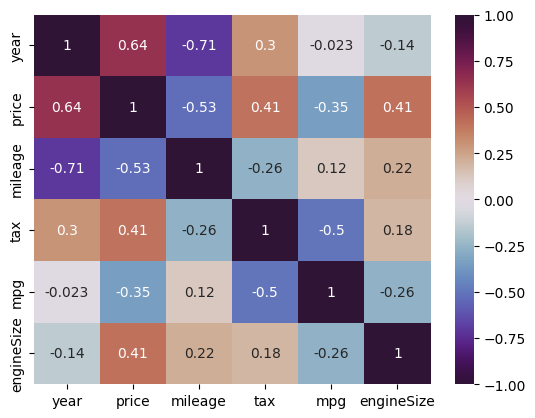

In [7]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="twilight_shifted");

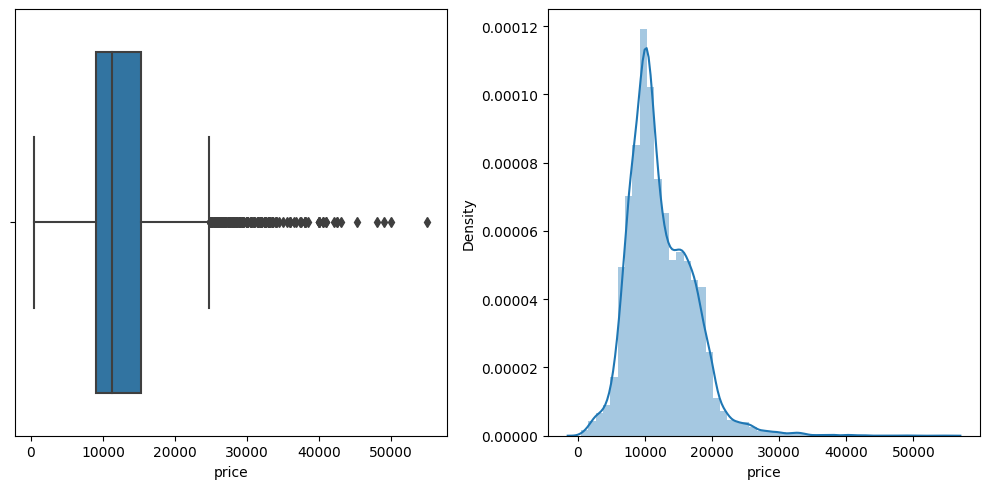

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="price")
plt.subplot(1, 2, 2)
sns.distplot(data.price);
plt.tight_layout()
plt.show()

In [9]:
lof = LocalOutlierFactor(n_neighbors=30)
lof.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
lof_scores = lof.negative_outlier_factor_
scores = np.sort(-lof_scores[:])

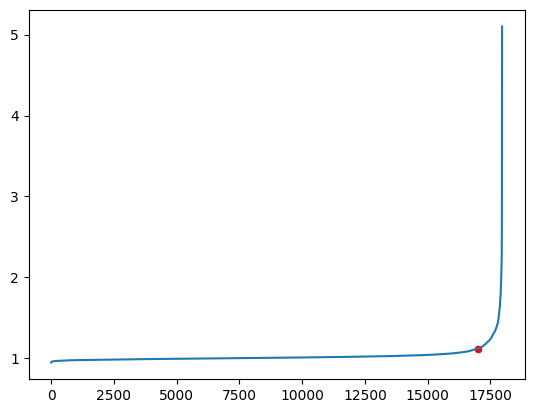

In [11]:
sns.lineplot(x=np.arange(len(scores)), y=scores);
sns.scatterplot(x=[17000], y=scores[17000], color="red");

In [12]:
esik_deger = -scores[17000]
aykiri_degerler = lof_scores > esik_deger
data = data[aykiri_degerler]

In [13]:
data = data[data["price"]<23500]

In [14]:
data.groupby("year")["price"].agg(["mean", "count"])

,mean,count
year,,
2002,1545.000000,2
2003,1695.000000,1
2004,1647.000000,2
2005,1582.111111,9
2006,1951.800000,5
2007,2710.294118,17
2008,2676.653846,26
2009,3481.113636,44
2010,4199.960000,50


In [15]:
data = data[data["year"] != 2060]

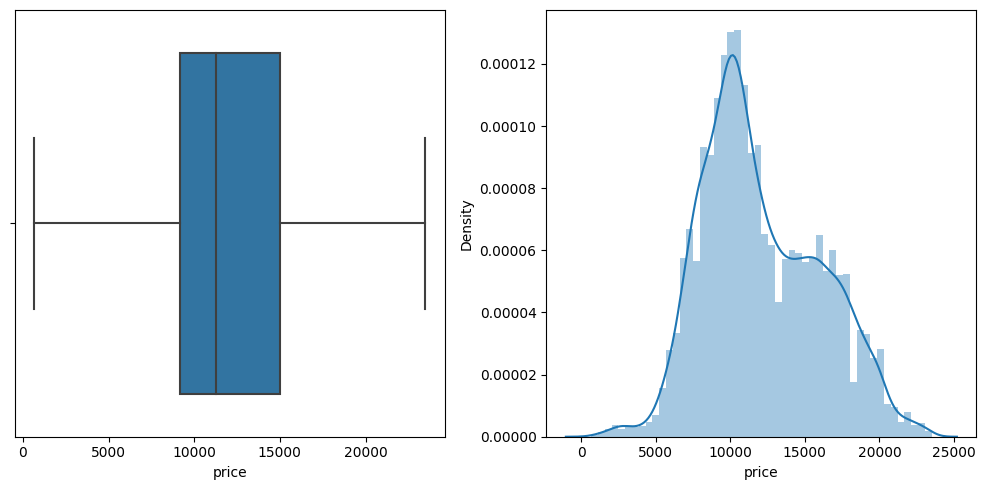

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="price")
plt.subplot(1, 2, 2)
sns.distplot(data.price);
plt.tight_layout()
plt.show()

In [17]:
X = data.drop(["price"], axis=1)
y = data[["price"]]
X.shape, y.shape

((16762, 5), (16762, 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=24)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
earlyStop = EarlyStopping(monitor="val_loss", mode="min", patience=25, verbose=1)

In [38]:
model = Sequential()

model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [39]:
model.fit(x=X_train, y=y_train, batch_size=250, epochs=300, validation_data=(X_test, y_test), callbacks=[earlyStop])

Epoch 1/300
51/51 [==============================] - 1s 3ms/step - loss: 161008288.0000 - val_loss: 161845040.0000
Epoch 2/300
51/51 [==============================] - 0s 2ms/step - loss: 160985888.0000 - val_loss: 161792848.0000
Epoch 3/300
51/51 [==============================] - 0s 2ms/step - loss: 160875200.0000 - val_loss: 161533952.0000
Epoch 4/300
51/51 [==============================] - 0s 2ms/step - loss: 160447936.0000 - val_loss: 160642288.0000
Epoch 5/300
51/51 [==============================] - 0s 2ms/step - loss: 159213248.0000 - val_loss: 158374528.0000
Epoch 6/300
51/51 [==============================] - 0s 2ms/step - loss: 156462640.0000 - val_loss: 153760432.0000
Epoch 7/300
51/51 [==============================] - 0s 2ms/step - loss: 151298176.0000 - val_loss: 145679952.0000
Epoch 8/300
51/51 [==============================] - 0s 2ms/step - loss: 142454064.0000 - val_loss: 132700640.0000
Epoch 9/300
51/51 [==============================] - 0s 2ms/step - loss: 1292754

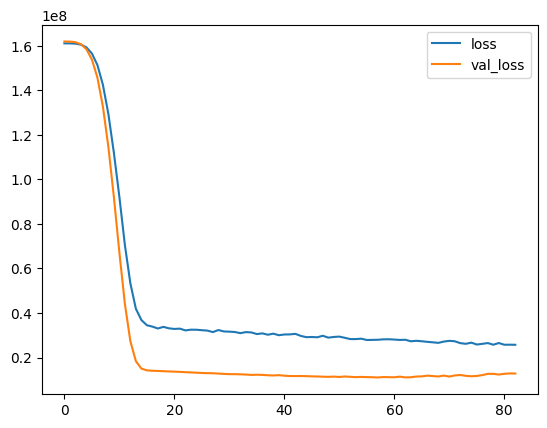

In [40]:
loss = pd.DataFrame(model.history.history)[["loss","val_loss"]]
loss.plot();

In [41]:
model.evaluate(X_train, y_train)

393/393 [==============================] - 0s 667us/step - loss: 9497712.0000


9497712.0

In [42]:
model.evaluate(X_test, y_test)

131/131 [==============================] - 0s 692us/step - loss: 12816567.0000


12816567.0

In [43]:
y_pred = model.predict(X_test)

131/131 [==============================] - 0s 644us/step


In [44]:
mean_absolute_error(y_test, y_pred)

2897.7688661109746